In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import os
import pickle
root_path = '../results/opt_tfer_expts/cifar_100_living_notliving_expts/wide_resnet_28_10_arch/tfer_nets/spc_10'
expts = os.listdir(root_path)
expts

['src_epoch_160',
 'src_epoch_30',
 'src_epoch_40',
 'src_epoch_10',
 'src_epoch_20',
 'src_epoch_140',
 'src_epoch_100',
 'src_epoch_190',
 'src_epoch_50',
 'src_epoch_200',
 'src_epoch_70',
 'src_epoch_0',
 'src_epoch_120',
 'src_epoch_170',
 'src_epoch_110',
 'src_epoch_180',
 'src_epoch_best',
 'src_epoch_150',
 'src_epoch_90',
 'src_epoch_60',
 'src_epoch_80',
 'src_epoch_130']

In [4]:
leaf_path = os.path.join('src_net_Chanticleer_v2', 'tr_set_a',
                         'Chanticleer_cifar_100_living_living_expts_v0')

In [5]:
res_dict = dict()
for curr_expt in expts:
    with open(os.path.join(root_path, curr_expt, leaf_path, 'metadata/Expt_output.log'),'r') as f:
        fl=f.readlines()
        acc = fl[-1].split(":")[1].split("%")[0].strip()
        epoch = curr_expt.split('_')[-1].strip()
        if epoch == 'best':
            epoch = 178
        res_dict[int(epoch)] = float(acc)

FileNotFoundError: [Errno 2] No such file or directory: '../results/opt_tfer_expts/cifar_100_living_notliving_expts/wide_resnet_28_10_arch/tfer_nets/spc_10/src_epoch_160/src_net_Chanticleer_v2/tr_set_a/Chanticleer_cifar_100_living_living_expts_v0/metadata/Expt_output.log'

In [38]:
for k in sorted(res_dict):
    print(k,res_dict[k])

0 16.29
10 44.63
20 49.65
30 53.19
40 52.28
50 54.3
60 53.92
70 53.59
80 52.84
90 43.96
100 41.37
110 50.5
120 51.26
130 47.88
140 27.52
150 21.23
160 10.7
170 11.74
178 12.38
180 13.12
190 13.39
200 13.54


In [100]:
epoch_dict = dict()
for curr_expt in expts:
    tr_dict = defaultdict(list)
    va_dict = defaultdict(list)
    fpath = os.path.join(root_path, curr_expt, 
                         leaf_path,'results.txt')
    with open (fpath) as f:
        fl = f.readlines()
        for ff in fl:
            if 'poch' in ff:
                tr_acc = float(ff.split(' acc_top_1:')[-1].split()[0])
                va_acc = float(ff.split('val_acc_top_1:')[-1].split()[0])
                epoch = int(ff.split('Epoch')[-1].split(':')[0].strip())
                tr_dict[epoch] = tr_acc
                va_dict[epoch] = va_acc
    src_epoch = curr_expt[10:]
    if src_epoch == 'best':
        src_epoch = 178
        best_flag = True
    else:
        src_epoch = int(src_epoch)
        best_flag = False
    
    epoch_dict[src_epoch]={'train':tr_dict, 'val':va_dict, 'best':best_flag}


In [119]:
def plot_full_expt(epoch, epoch_dict):

    curr_data= epoch_dict[epoch]
    curr_train = curr_data['train']
    curr_val = curr_data['val']

    fig, ax = plt.subplots(1,1,sharex=True)
    ep_list = []
    tr_list = []
    va_list = []
    for ep in sorted(curr_train):
        ep_list.append(ep)
        tr_list.append(curr_train[ep])
        va_list.append(curr_val[ep])
    ax.plot(ep_list,tr_list,color = 'darkgreen', label='Training')
    ax.plot(ep_list,va_list,color = 'steelblue', label='Validation')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_ylim([0,1])
    ep_str = str(epoch)
    if curr_data['best'] == True:
        ep_str += ' (best)'
    ax.set_title('Transfer from Source Epoch ' + ep_str)
    plt.savefig("SourceEpoch_" + str(epoch))

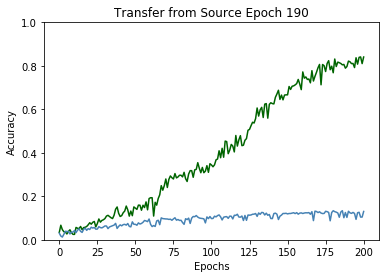

In [120]:
plot_full_expt(190,epoch_dict)

In [121]:
os.getcwd()

'/home/smgutstein/Projects/SG_Projects/opt-tfer/notebooks'

/home/smgutstein/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/home/smgutstein/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


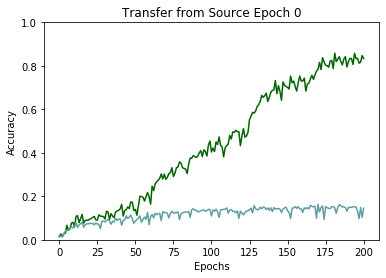

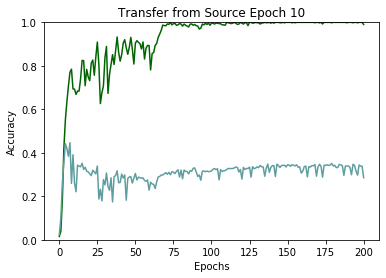

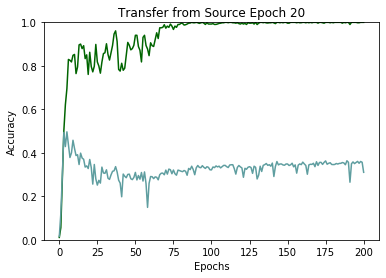

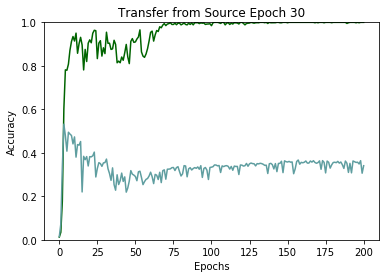

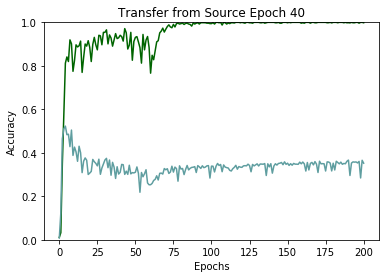

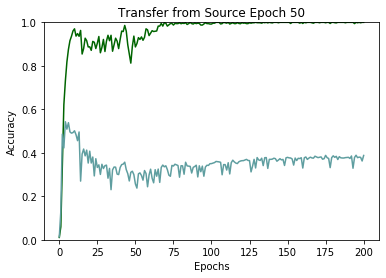

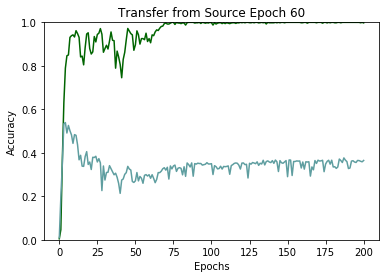

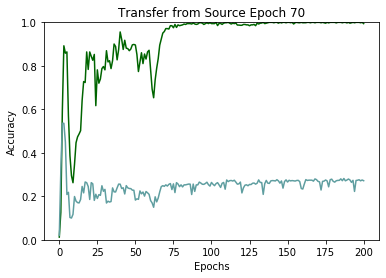

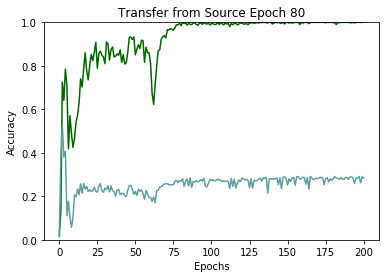

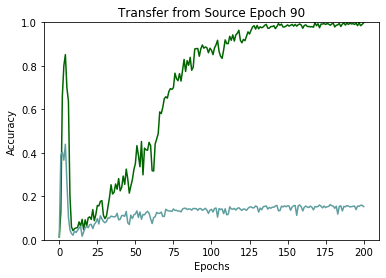

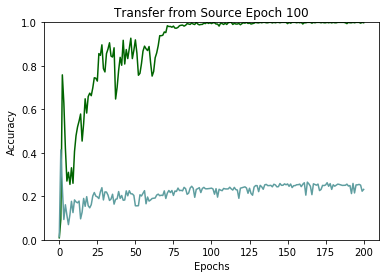

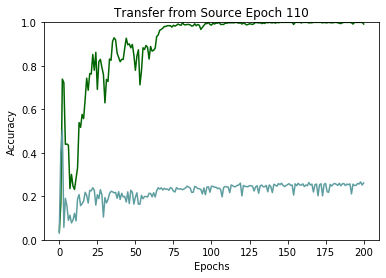

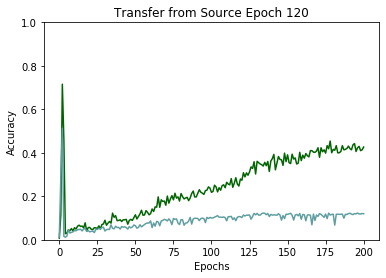

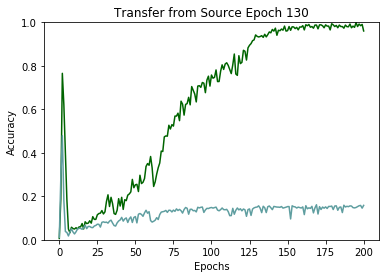

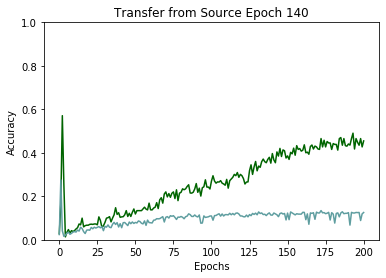

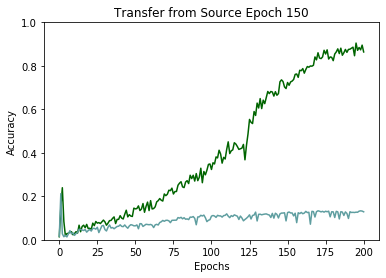

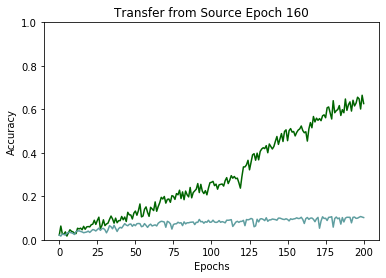

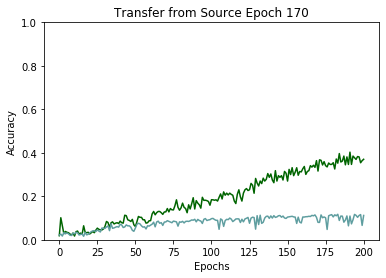

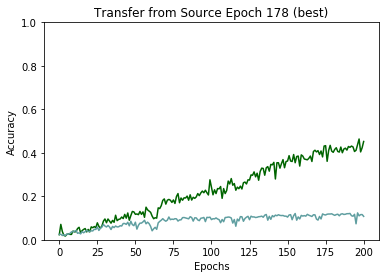

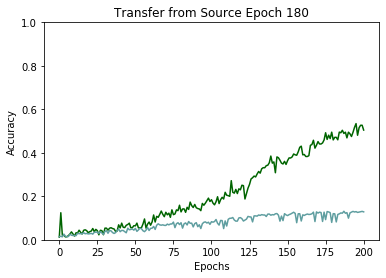

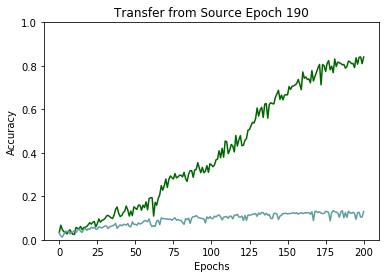

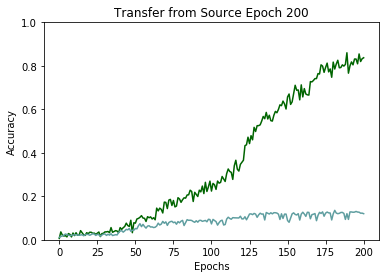

In [116]:
for x in sorted(res_dict):
    plot_full_expt(x,epoch_dict)